In [10]:
import pandas as pd
from plotnine import *
import matplotlib as mpl
from sklearn.cluster import KMeans
# mpl.rcParams['font.family'] = 'SimHei'
# mpl.rcParams['axes.unicode_minus'] = False
# mpl.rcParams['font.sans-serif'] = 'SimHei'

In [2]:
df = pd.read_csv(r'C:\Users\1000257489\Documents\2022\Angelina\Study\Beautiful_Visualization_with_Python\Beautiful-Visualization-with-python-master\第5章 数据关系型图表\HighDensity_Scatter_Data.csv')
df.shape, df.head()

((10000, 2),
           x         y
 0 -0.603533 -0.412572
 1  0.138715  0.173584
 2  0.542221 -0.460046
 3 -1.172849 -0.143668
 4  0.214562 -0.275565)

#### (b) 带透明度设置的散点图

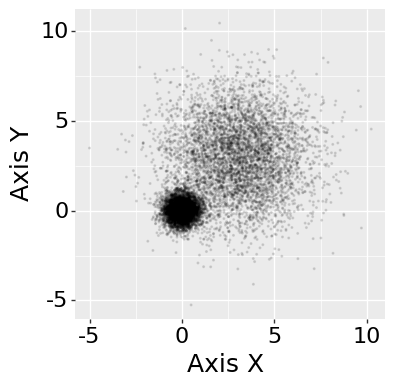

In [13]:
p1 = (ggplot(df, aes(x='x', y='y'))
      + geom_point(shape='.', size=1, color='black', alpha=0.1)
      + labs(x='Axis X', y='Axis Y')
      + theme(axis_title=element_text(size=18, color='k', face='plain'),
             axis_text=element_text(size=16, color='k', face='plain'),
             aspect_ratio=1,
             dpi=100,
             figure_size=(4, 4))
     )
print(p1)

#### (d) 带椭圆标定的聚类散点图

In [14]:
estimator = KMeans(n_clusters=2)
estimator.fit(df)
df['label_pred'] = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ #Sum of squared distances of samples to their closest cluster center

In [15]:
df.head()

,x,y,label_pred
0,-0.603533,-0.412572,0
1,0.138715,0.173584,0
2,0.542221,-0.460046,0
3,-1.172849,-0.143668,0
4,0.214562,-0.275565,0


In [16]:
df['label_pred'].value_counts()

0    6070
1    3930
Name: label_pred, dtype: int64

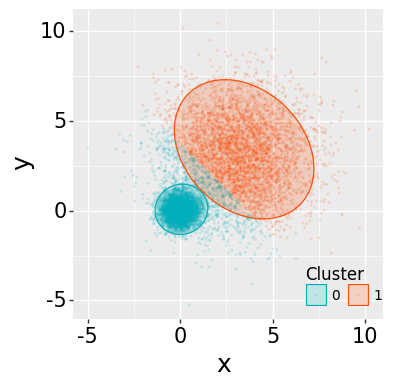

In [43]:
p2 = (ggplot(df, aes(x='x', y='y', color='factor(label_pred)'))
      + geom_point(shape='.', size=1, alpha=0.1)
      + stat_ellipse(aes(x='x', y='y', fill='factor(label_pred)'), geom='polygon', level=0.95, alpha=0.2) #加椭圆框的
      + scale_color_manual(values=["#00AFBB","#FC4E07"])
      + scale_fill_manual(values=["#00AFBB","#FC4E07"])
      + guides(fill = guide_legend(title='Cluster'), color = guide_legend(title='Cluster'))
      + theme(axis_title=element_text(size=18, color='k', face='plain'),
             axis_text=element_text(size=15, color='k', face='plain'),
             legend_title=element_text(size=12, color='k', face='plain'),
             legend_text=element_text(size=10, color='k', face='plain'),
             legend_position=(0.8, 0.2),
#              legend_direction='vertical',
             legend_background=element_blank(),
             aspect_ratio=1,
             figure_size=(4, 4),
             dpi=100)
     )
print(p2)

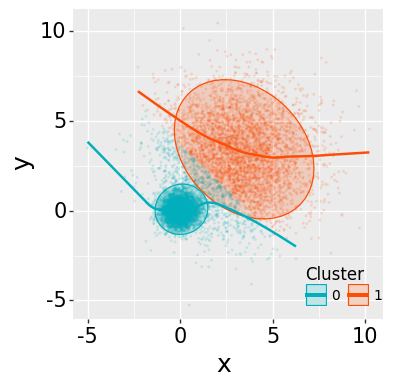

In [49]:
p3 = (ggplot(df, aes(x='x', y='y', color='factor(label_pred)'))
      + geom_point(shape='.', size=1, alpha=0.1)
      + stat_ellipse(aes(x='x', y='y', fill='factor(label_pred)'), geom='polygon', level=0.95, alpha=0.2) #加椭圆框的
      + geom_smooth(method='lowess', span=0.4, se=False, size=1)
      + scale_color_manual(values=["#00AFBB","#FC4E07"])
      + scale_fill_manual(values=["#00AFBB","#FC4E07"])
      + guides(fill = guide_legend(title='Cluster'), color = guide_legend(title='Cluster'))
      + theme(axis_title=element_text(size=18, color='k', face='plain'),
             axis_text=element_text(size=15, color='k', face='plain'),
             legend_title=element_text(size=12, color='k', face='plain'),
             legend_text=element_text(size=10, color='k', face='plain'),
             legend_position=(0.8, 0.2),
#              legend_direction='vertical',
             legend_background=element_blank(),
             aspect_ratio=1,
             figure_size=(4, 4),
             dpi=100)
     )
print(p3)

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_ellipse : Removed 117 rows containing non-finite values.


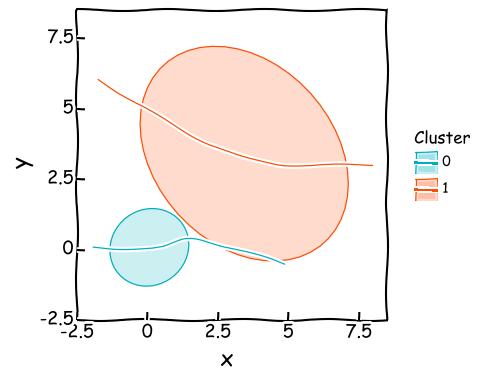

In [63]:
p4 = (ggplot(df, aes(x='x', y='y', color='factor(label_pred)'))
#       + geom_point(shape='.', size=1, alpha=0.1)
      + stat_ellipse(aes(x='x', y='y', fill='factor(label_pred)'), geom='polygon', level=0.95, alpha=0.2) #加椭圆框的
      + geom_smooth(method='lowess', span=0.6, se=False, size=0.5)
      + xlim(-2, 8)
      + ylim(-2, 8)
      + scale_color_manual(values=["#00AFBB","#FC4E07"])
      + scale_fill_manual(values=["#00AFBB","#FC4E07"])
      + guides(fill = guide_legend(title='Cluster'), color = guide_legend(title='Cluster'))
      + theme_xkcd() # theme_matplotlib()
      + theme(axis_title=element_text(size=16, color='k', face='plain'),
             axis_text=element_text(size=13, color='k', face='plain'),
             legend_title=element_text(size=12, color='k', face='plain'),
             legend_text=element_text(size=10, color='k', face='plain'),
             legend_position='right',
#              legend_direction='vertical',
             legend_background=element_blank(),
             aspect_ratio=1,
             figure_size=(4, 4),
             dpi=100)
     )
print(p4)

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_ellipse : Removed 152 rows containing non-finite values.


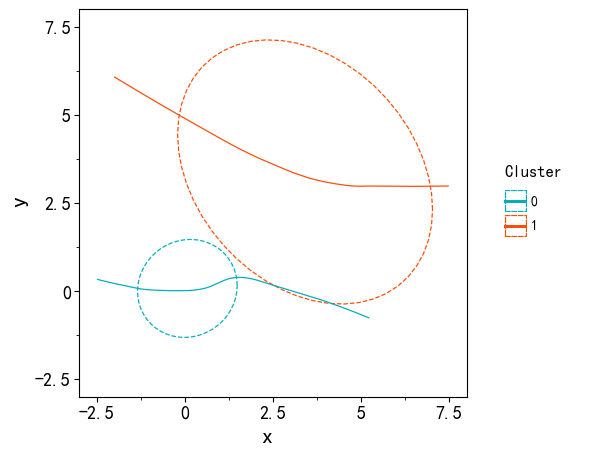

In [68]:
p5 = (ggplot(df, aes(x='x', y='y', color='factor(label_pred)'))
#       + geom_point(shape='.', size=1, alpha=0.1)
      + stat_ellipse(aes(x='x', y='y', color='factor(label_pred)'), fill='none', geom='polygon', level=0.95, alpha=0.2, linetype='dashed') #加椭圆框的
      + geom_smooth(method='lowess', span=0.6, se=False, size=0.5)
      + xlim(-2.5, 7.5)
      + ylim(-2.5, 7.5)
      + scale_color_manual(values=["#00AFBB","#FC4E07"])
      + scale_fill_manual(values=["#00AFBB","#FC4E07"])
      + guides(fill = guide_legend(title='Cluster'), color = guide_legend(title='Cluster'))
      + theme_matplotlib()
      + theme(axis_title=element_text(size=16, color='k', face='plain'),
             axis_text=element_text(size=13, color='k', face='plain'),
             legend_title=element_text(size=12, color='k', face='plain'),
             legend_text=element_text(size=10, color='k', face='plain'),
             legend_position='right',
#              legend_direction='vertical',
             legend_background=element_blank(),
             aspect_ratio=1,
             figure_size=(5, 5),
             dpi=100)
     )
print(p5)

In [69]:
p5.save('图5-1-9.png')

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: 图5-1-9.png
C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_ellipse : Removed 152 rows containing non-finite values.
